***PRACTICA 2***

In [295]:
import numpy as np
import pandas as pd

df = pd.read_csv('Data\housesBrazil.csv')


**Tipos de datos por cada columna**

In [296]:
df.dtypes

Unnamed: 0         int64
city               int64
area               int64
rooms              int64
bathroom           int64
parking spaces     int64
floor             object
animal            object
furniture         object
hoa               object
rent amount        int64
property tax      object
fire insurance     int64
total              int64
dtype: object

**Generar el análisis estadístico general**

In [297]:
df.describe(include= 'all')

,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,animal,furniture,hoa,rent amount,property tax,fire insurance,total
count,6080.00000,6080.000000,6080.000000,6080.000000,6080.000000,6080.000000,6080,6080,6080,6080,6080.000000,6080,6080.000000,6080.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,37,2,2,1292,NaN,1036,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,-,acept,not furnished,0,NaN,0,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,1555,4666,4498,1291,NaN,1053,NaN,NaN
mean,3039.50000,0.863322,151.143914,2.492599,2.341612,1.756250,NaN,NaN,NaN,NaN,4395.844408,NaN,58.204276,6033.194572
std,1755.28915,0.343535,375.559485,1.129665,1.438860,1.611909,NaN,NaN,NaN,NaN,3576.668946,NaN,49.313441,8751.347700
min,0.00000,0.000000,10.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,420.000000,NaN,3.000000,660.000000
25%,1519.75000,1.000000,58.000000,2.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1800.000000,NaN,23.000000,2451.500000
50%,3039.50000,1.000000,100.000000,3.000000,2.000000,1.000000,NaN,NaN,NaN,NaN,3111.000000,NaN,41.000000,4128.500000
75%,4559.25000,1.000000,200.000000,3.000000,3.000000,2.000000,NaN,NaN,NaN,NaN,5952.500000,NaN,77.000000,8074.000000


Crear una nueva base de datos solo con los datos numéricos (float e int), revisar
si alguna columna tiende datos tipo Objeto que deberían ser de tipo int o float

In [298]:
df.dropna()

#La columna floor deberia ser de tipo entero, solo el valor '-' puede ser reemplazado por '0'
df['floor'] = df['floor'].replace('-', '0')
df['property tax'] = df['property tax'].replace('Incluso', '0')

#Obtener solo los valores enteros o flotantes
df['floor'] = df['floor'].astype(int)
df['property tax'] = df['property tax'].astype(int)

df_new = df.select_dtypes(include = ['float', 'integer'])

#Tipos de los nuevos datos numericos -  Validación
df_new.dtypes


Unnamed: 0        int64
city              int64
area              int64
rooms             int64
bathroom          int64
parking spaces    int64
floor             int32
rent amount       int64
property tax      int32
fire insurance    int64
total             int64
dtype: object

Guardar la BD con el nombre : baseDatosNueva.csv (no debe contener los
índices)

In [299]:
#Crear la ruta de salida
ruta_salida = 'Data' + '/' + 'baseDatosNueva.csv'
df_new = df_new.drop(df_new.columns[0], axis=1)
df_new
#Exportar
df_new.to_csv(ruta_salida)

Cargar baseDatosNueva.csv e calcular por cada columna, la cantidad de datos
que hay, el máximo, mínimo, la suma de los datos por columna

In [300]:
df_B_new = pd.read_csv('Data/baseDatosNueva.csv')

df_B_new.describe().loc[['count', 'min', 'max']]


,Unnamed: 0,city,area,rooms,bathroom,parking spaces,floor,rent amount,property tax,fire insurance,total
count,6080.0,6080.0,6080.0,6080.0,6080.0,6080.0,6080.0,6080.0,6080.0,6080.0,6080.0
min,0.0,0.0,10.0,1.0,1.0,0.0,0.0,420.0,0.0,3.0,660.0
max,6079.0,1.0,24606.0,10.0,10.0,12.0,99.0,45000.0,366300.0,677.0,372700.0


Dibujar un scatter plot de la relación entre cantidad de “rooms” vs “area” y “rent
amount” vs property tax.

<AxesSubplot:xlabel='rent amount', ylabel='property tax'>

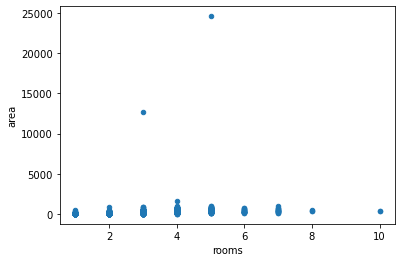

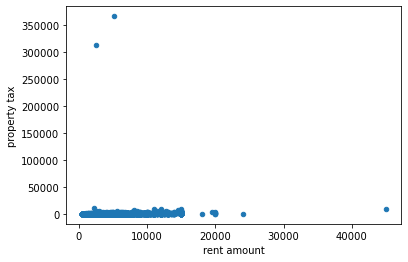

In [301]:

df_B_new.plot.scatter(x = 'rooms', y = 'area')
df_B_new.plot.scatter(x = 'rent amount', y = 'property tax')

Calcular el valor medio de cada columna. Con las columnas en posición par
sumar el valor medio y en posición impar restar el valor medio, actualizar los
valores de la columna (no realizar este proceso con la columna “total”).

In [302]:
df_B_new.median()

df_B_new_not_total = df_B_new.iloc[:, :-1]

columnas_pares = df_B_new_not_total.columns[::2] 
media_columnas_pares = df_B_new_not_total[columnas_pares].mean()  # Calcular la media de esas columnas
df_B_new[columnas_pares] = df_B_new_not_total[columnas_pares] + media_columnas_pares

columnas_impares = df_B_new_not_total.columns[1::2] 
media_columnas_impares = df_B_new_not_total[columnas_impares].mean()  # Calcular la media de esas columnas
df_B_new[columnas_impares] = df_B_new_not_total[columnas_impares] - media_columnas_impares


La columna “total”, se actualizará de la siguiente manera, calcular el maximo y
minimo para calcular la diferencia entre ellos (diff=máximo - mínimo) y dividir
entre 3 (a = diff/3), de tal forma que se tiene los siguientes intervalos: [min,
min+a, min 2*a, max], por lo tanto los valores de la columna “total” que se
encuentran entre el [min, min+a], se cambian por 1, los que están entre [min +a,
min +2a], por 2 y los que quedan cambian por 3 ([x,y], mayor igual a x, menor
que y ).

In [308]:
df_total = df_B_new.iloc[:,-1]
#dif = df_total.min
min = df_total.min()
max = df_total.max()
dif = max-min 
a = (dif)/3

#df_total[not (min < df_total < min+a) & (min +a < df_total < min + 2*a)] = 3
df_total_1 = df_total[(min <= df_total) & (df_total <= min+a)] = 1
df_total_2 = df_total[(min +a <= df_total) & (df_total <= min + 2*a)] = 2

df_total[df_total_1]
df_total[df_total_2]


C:\Users\DELL\AppData\Local\Temp/ipykernel_5936/2397944541.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_1 = df_total[(min <= df_total) & (df_total <= min+a)] = 1
C:\Users\DELL\AppData\Local\Temp/ipykernel_5936/2397944541.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_2 = df_total[(min +a <= df_total) & (df_total <= min + 2*a)] = 2


**Guardar la base de datos con otro nombre.**

In [ ]:
ruta_b_salida = 'Data' + '/' + 'baseDatosNueva1.csv'
#Exportar
df_B_new.to_csv(ruta_b_salida)


Unnamed: 0        int64
city              int64
area              int64
rooms             int64
bathroom          int64
parking spaces    int64
floor             int32
rent amount       int64
property tax      int32
fire insurance    int64
total             int64
dtype: object

Por otro lado, solo con la primera columna de baseDatosNueva.csv , realizar lo
siguiente (numpy):

+ Indicar la cantidad de elementos,




In [311]:
#df_B_new_1 = pd.read_csv('Data/baseDatosNueva.csv')
df_B_new_col_1 = df_B_new.iloc[:,0]


+ Guardar los primeros 100 elementos en un arreglo de tipo ndarray.


In [312]:
selected_data = df_B_new_col_1.iloc[:100].values
print(selected_data)

[3039.5 3040.5 3041.5 3042.5 3043.5 3044.5 3045.5 3046.5 3047.5 3048.5
 3049.5 3050.5 3051.5 3052.5 3053.5 3054.5 3055.5 3056.5 3057.5 3058.5
 3059.5 3060.5 3061.5 3062.5 3063.5 3064.5 3065.5 3066.5 3067.5 3068.5
 3069.5 3070.5 3071.5 3072.5 3073.5 3074.5 3075.5 3076.5 3077.5 3078.5
 3079.5 3080.5 3081.5 3082.5 3083.5 3084.5 3085.5 3086.5 3087.5 3088.5
 3089.5 3090.5 3091.5 3092.5 3093.5 3094.5 3095.5 3096.5 3097.5 3098.5
 3099.5 3100.5 3101.5 3102.5 3103.5 3104.5 3105.5 3106.5 3107.5 3108.5
 3109.5 3110.5 3111.5 3112.5 3113.5 3114.5 3115.5 3116.5 3117.5 3118.5
 3119.5 3120.5 3121.5 3122.5 3123.5 3124.5 3125.5 3126.5 3127.5 3128.5
 3129.5 3130.5 3131.5 3132.5 3133.5 3134.5 3135.5 3136.5 3137.5 3138.5]


+ Calcular la suma de los mismos


In [315]:
sum_of_elements = np.sum(selected_data)
sum_of_elements

308900.0

+ Calcular el promedio.


In [316]:
mean_of_elements = np.mean(selected_data)
mean_of_elements

3089.0

+ Indicar en qué posición o posiciones están los elementos maximos y minimos (devolver las posiciones en una lista)

In [319]:
indice_maximo = np.argmax(selected_data)
indice_minimo = np.argmin(selected_data)

# Imprimir los resultados
print("Posición del máximo:", indice_maximo)
print("Posición del mínimo:", indice_minimo)

Posición del máximo: 99
Posición del mínimo: 0
